# Imports


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from IPython.display import set_matplotlib_formats
from matplotlib.ticker import FuncFormatter
set_matplotlib_formats('svg')

# Initial core

In [ ]:
def initial(p,N):
    if (p<1):          #Binomial initial condition
        inode=[]
        ilink=[]
        bi = np.ndarray.tolist(np.random.binomial(N,p,N))
        for i in range (N):
            inode.append(i+1)
            ilink.append(bi[i])

    else:               #fixed initial condition
        inode=[]
        ilink=[]
        n=p             #Enter N and n here
        for i in range (N):
            inode.append(i+1)
            ilink.append(n)
    return [inode,ilink]

In [ ]:
def add(p,i,j):
    rand=random.random()
    if ((rand<p)&(i>j)): return 1
    else: return 0

# Final link distribution

In [ ]:
def New(x,y):
    node=x.copy()
    link=y.copy()
    for l in range(Add):
        sum=0
        for i in link: sum+=i
        nlink=[link[0]/sum]
        for j in range(1,len(link)): nlink.append(nlink[j-1]+(link[j])/sum)
        k=1;err=0
        b=[]
        while(k<=m):
            ran=random.random()
            for i in range(len(nlink)):
                if (ran<= nlink[i]):
                    a=i
                    if a not in b:
                        link[a]+=1
                        b.append(a)
                        k+=1
                    break
            err+=0.01
            if err==100 :
                print("error occured")
                break
        t=(node[-1])+1
        node.append(t)
        link.append(m)
    return [node,link]

# Degree Distribution

In [ ]:
def degree_distribution():

    global degree,node,cumulative,final,deg,xrange
    degree=[]
    for i in range(0, nf):
        degree.append(0)
    node=[]
    for i in range(1, nf+1):
        node.append(i)

    for i in range (0, nf):
        j=0
        for k in range(0, nf):
            if(A[k]==i+1):
                j=j+1
        degree[i]=j/float(nf)
    cumulative=[]
    for i in range (0, nf):
        cumulative.append(0)
    #cumulative[0]=0
    for i in range (0,nf-1):
        cumulative[i+1]=cumulative[i]+degree[nf-1-i]

    cumulative[nf-1]=1
    cumulative[nf-1]
    cumulative1=[]
    for i in range (0, nf):
        cumulative1.append(cumulative[i])
    modi=[]
    for i in range(0, nf):
        modi.append(0)
    for i in range(0, nf):
        if cumulative[i] not in modi:
            modi[i]=cumulative[i]
    for i in range(0, nf):
        cumulative[i]=modi[i]

    final=[]
    for i in range (0, nf):
        final.append(cumulative[nf-1-i])

    deg=[nf*degree[i] for i in range(nf)]
    xrange=list(np.trim_zeros(degree,'b'))

In [ ]:
def run(arg):
    a1=[[add(p,i,j) for i in range(N)] for j in range(N)]
    a2=list(map(sum,(np.add(np.array(a1),np.array(a1).T)).tolist()))                                              #sum1=sum(map(sum,a1))


    init=initial(p,N)
    inode=init[0].copy()
    ilink=init[1].copy()
    #if arg!="b": ilink=a2.copy()
    print("Initial nodes :",inode,"\n","\n","Initial links :",ilink,"\n","\n","Length of the list of nodes and links :",len(inode),",",len(ilink),"\n\n")

    presult=New(inode,ilink)
    node=presult[0].copy()
    link=presult[1].copy()
    global A
    A=link

    if (Add<101): print("Final Nodes :",node,"\n","\n")
    if (Add<201): print("Final links :",link,"\n","\n","Length of list of nodes and links :",len(node),",",len(link))
    degree_distribution()



In [ ]:
def run_plot():

    x1=[]
    x2=[]
    y1=[]
    y2=[]
    x=[]
    for i in range(1,nf+1):
        x.append(i)
    for i in range(1, N+1):
        x1.append(i)
    for i in range( N+1, nf+1):
        x2.append(i)

    for i in range(1,  N+1):
        y1.append(A[i-1])
    for i in range( N+1, nf+1):
        y2.append(A[i-1])


    fig, ax = plt.subplots(figsize = (9, 6))
    plt.scatter(x1, y1,s=5)
    plt.scatter(x2, y2,s=5)
    plt.legend(["Initial nodes" , "New nodes"])
    plt.title("Number of links vs Node number",size=15)
    plt.ylabel("Number of links",size=15)
    plt.xlabel("Node number",size=15)
    plt.show()

    #print(len(deg),len(node))

    fig, ax = plt.subplots(figsize = (9, 6))
    plt.scatter(node, deg)
    plt.title("Degree distribution",size=15)
    plt.xlabel("Number of links",size=15)
    plt.ylabel("Number of nodes with \n corresponding number of links",size=15)
    plt.xlim([1, len(xrange)])
    plt.show()

    fig, ax = plt.subplots(figsize = (9, 6))
    ax.scatter(node, deg)
    plt.title("Degree distribution (Log scale)",size=15)
    plt.xlabel("Number of links",size=15)
    plt.ylabel("Number of nodes with \n corresponding number of links",size=15)
    # Set logarithmic scale on the both variables
    ax.loglog()
    for axis in [ax.xaxis, ax.yaxis]:
        formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
        axis.set_major_formatter(formatter)
    #plt.xlim([1, len(xrange)])
    plt.show()

    fig, ax = plt.subplots(figsize = (9, 6))
    ax.scatter(x, final)

    # Set logarithmic scale on the both variables
    ax.loglog()
    plt.title("Degree distribution (Log scale)",size=15)
    plt.xlabel("number of Links",size=15)
    plt.ylabel("Cumulative probability",size=15)
    plt.xlim()
    ax.xaxis.tick_top()
    for axis in [ax.xaxis, ax.yaxis]:
        formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
        axis.set_major_formatter(formatter)

    plt.show()

# Initial conditions

In [ ]:
N=10
Add=90
nf=N+Add
p=0.1
m=5

#p2=0.1
# Results
#Enter b for binomial core
run("b")

Initial nodes : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 
 Initial links : [0, 1, 0, 2, 2, 3, 1, 2, 2, 0] 
 
 Length of the list of nodes and links : 10 , 10 


Final Nodes : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] 
 

Final links : [0, 11, 0, 26, 28, 20, 15, 21, 28, 0, 34, 19, 15, 23, 15, 14, 24, 19, 10, 16, 17, 12, 11, 8, 11, 11, 9, 10, 18, 9, 6, 7, 6, 10, 10, 8, 9, 9, 8, 10, 8, 7, 9, 5, 7, 7, 7, 7, 9, 6, 7, 6, 10, 8, 6, 5, 10, 6, 7, 5, 5, 9, 6, 6, 7, 10, 6, 7, 8, 7, 6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5] 
 
 Length of list of nodes and links : 100 , 100


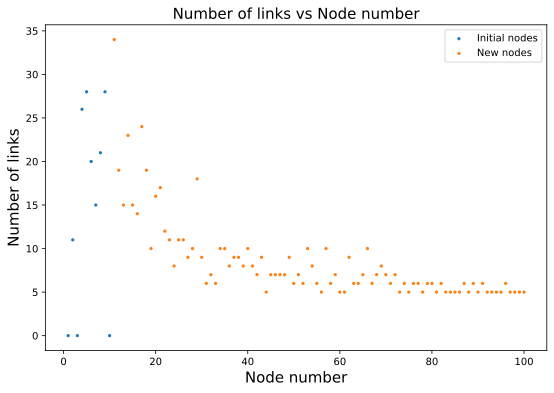

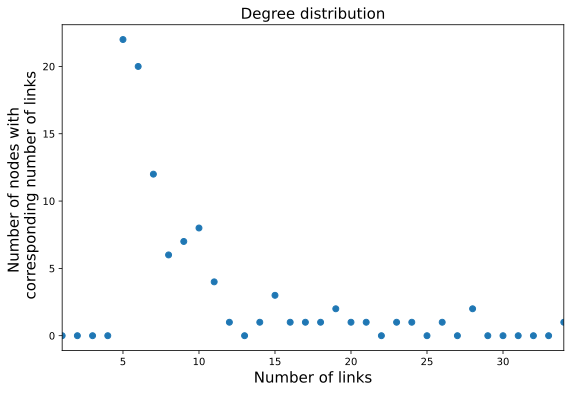

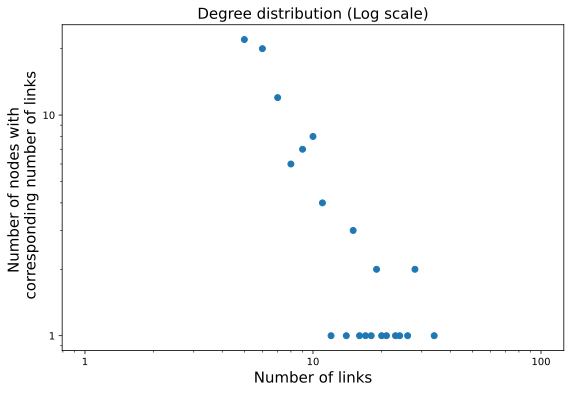

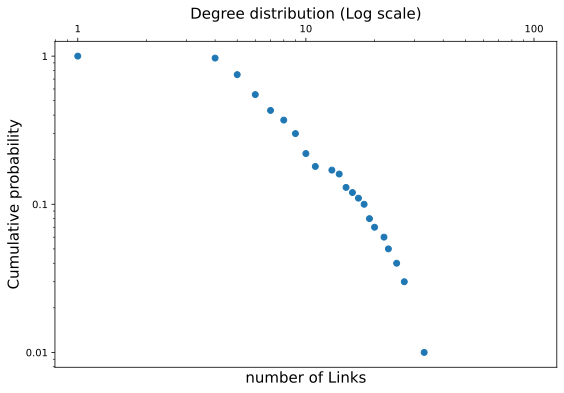

In [ ]:
run_plot()

In [ ]:
#plt.scatter(np.log(x), np.log(degree))
#plt.show()

In [ ]:
#print(final)